<a href="https://colab.research.google.com/github/AbrarAli-SE/Code-a-Ai/blob/main/Project_01_Short.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Step 1

## Import Libraries

In [ ]:

import pandas as pd           # For working with tables/data
import numpy as np            # For math operations
import matplotlib.pyplot as plt  # For plotting graphs
import seaborn as sns         # For nicer plots
from sklearn.model_selection import train_test_split  # To split data
from sklearn.preprocessing import StandardScaler      # To scale/normalize data
import tensorflow as tf       # For building neural network
from tensorflow import keras  # Easier way to use TensorFlow

print("✅ All libraries imported successfully!")

✅ All libraries imported successfully!


## Import Data Sheet

In [ ]:
from google.colab import files

uploaded = files.upload()

print("✅ File uploaded!")

Saving diabetes.csv to diabetes (1).csv
✅ File uploaded!


## Load First 5 Rows of data

In [ ]:
df = pd.read_csv('diabetes.csv')

# Show first 5 rows of the data
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Step 2

## Explore Basic Info About Dataset

In [ ]:
print("Dataset Shape:", df.shape)

print("\nColumn Data Types:")
print(df.dtypes)

print("\nBasic Statistics:")
print(df.describe())

Dataset Shape: (768, 9)

Column Data Types:
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

Basic Statistics:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.2

## Handle Impossible **Zeros**

In [ ]:
zero_columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Replace 0 with median for each of these columns
for col in zero_columns:
    df[col] = df[col].replace(0, df[col].median())

print("✅ Zeros replaced with median in critical columns!")

✅ Zeros replaced with median in critical columns!


## Visualize One Plot — Histogram of Age

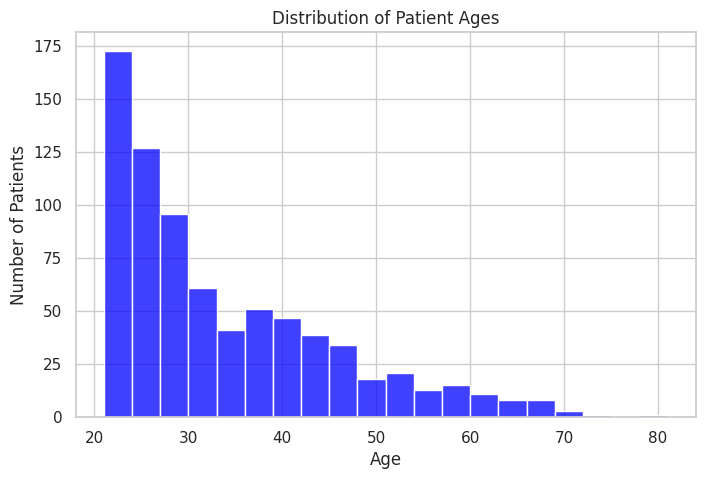

In [ ]:
# Set style for nicer plots
sns.set(style="whitegrid")

# Plot histogram of Age
plt.figure(figsize=(8,5))
sns.histplot(df['Age'], bins=20, kde=False, color='blue')
plt.title('Distribution of Patient Ages')
plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.show()

## Split Data into Features (X) and Target (y)

In [ ]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

print("✅ Features (X) and Target (y) separated!")
print("X shape:", X.shape)
print("y shape:", y.shape)

✅ Features (X) and Target (y) separated!
X shape: (768, 8)
y shape: (768,)


## Split into Train (80%) and Test (20%)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("✅ Data split into train and test sets!")
print("Training set size:", X_train.shape[0])
print("Test set size:", X_test.shape[0])

✅ Data split into train and test sets!
Training set size: 614
Test set size: 154


## Scale the Features

In [ ]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

print("✅ Features scaled successfully!")
print("Example of scaled training data (first row):")
print(X_train_scaled[0])

✅ Features scaled successfully!
Example of scaled training data (first row):
[-0.52639686 -1.25688146 -0.01899526 -0.45487119 -0.61269674 -0.05024677
 -0.49073479 -1.03594038]


# Step 3

## Build the Neural Network

In [11]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Input(shape=(8,)),
    layers.Dense(16, activation='relu'),
    layers.Dense(8, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

print("✅ Model structure defined (no warnings!)")

✅ Model structure defined (no warnings!)


## COMPILE the Model

In [12]:
# Compile the model

model.compile(
    optimizer='adam',               # Smart optimizer that adjusts learning
    loss='binary_crossentropy',     # Measures how wrong the predictions are (for 0/1 problems)
    metrics=['accuracy']            # We want to track % of correct predictions
)

print("✅ Model compiled and ready for training!")

✅ Model compiled and ready for training!


## Show Model Summary

In [13]:
# Display the model architecture

model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 289 (1.13 KB)

 Trainable params: 289 (1.13 KB)

 Non-trainable params: 0 (0.00 B)

# Step 4


## TRAIN THE MODEL

In [14]:
# Train the model

history = model.fit(
    X_train_scaled, y_train,        # Training data
    epochs=150,
    validation_split=0.2,           # Use 20% of training data to check progress
    verbose=1                       # Show progress bar (1 = yes, 0 = silent)
)

print("✅ Training completed!")

Epoch 1/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 90ms/step - accuracy: 0.4559 - loss: 0.7082 - val_accuracy: 0.4878 - val_loss: 0.6921
Epoch 2/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5668 - loss: 0.6949 - val_accuracy: 0.5772 - val_loss: 0.6677
Epoch 3/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6577 - loss: 0.6584 - val_accuracy: 0.6585 - val_loss: 0.6441
Epoch 4/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6692 - loss: 0.6417 - val_accuracy: 0.6748 - val_loss: 0.6225
Epoch 5/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7186 - loss: 0.6074 - val_accuracy: 0.7073 - val_loss: 0.6031
Epoch 6/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7488 - loss: 0.5727 - val_accuracy: 0.6992 - val_loss: 0.5850
Epoch 7/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7544 - loss: 0.5552 - val_accuracy: 0.7073 - val_loss: 0.5666
Epoch 8/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7630 - loss: 0.5384 - val_accuracy: 0.6992 - 

## PLOT TRAINING HISTORY

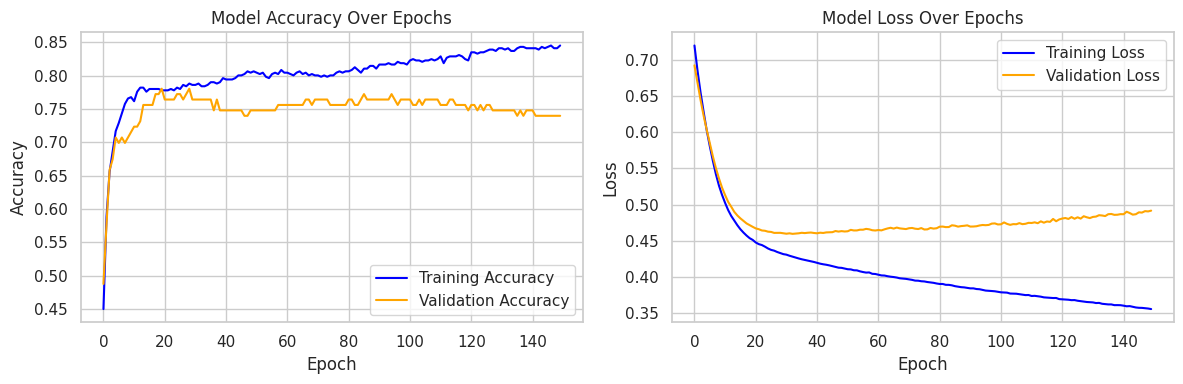

In [15]:
# Plot training & validation accuracy and loss

plt.figure(figsize=(12, 4))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

## MAKE PREDICTIONS ON TEST SET

In [16]:
# Make probability predictions on test set
y_pred_prob = model.predict(X_test_scaled)

# Convert probabilities to binary (0 or 1) using 0.5 threshold
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

print("✅ Predictions made on test set!")
print("First 10 predicted probabilities:", y_pred_prob[:10].flatten())
print("First 10 binary predictions:", y_pred[:10])

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
✅ Predictions made on test set!
First 10 predicted probabilities: [0.42086023 0.04765718 0.03812752 0.30865788 0.29915914 0.820995
 0.00404804 0.60945046 0.74007857 0.6160489 ]
First 10 binary predictions: [0 0 0 0 0 1 0 1 1 1]


##  EVALUATE PERFORMANCE

In [17]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Calculate Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"✅ Test Accuracy: {acc:.4f} ({acc*100:.2f}%)")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\n✅ Confusion Matrix:")
print(cm)

# Classification Report
print("\n✅ Classification Report:")
print(classification_report(y_test, y_pred, target_names=['No Diabetes (0)', 'Diabetes (1)']))

✅ Test Accuracy: 0.7208 (72.08%)

✅ Confusion Matrix:
[[76 23]
 [20 35]]

✅ Classification Report:
                 precision    recall  f1-score   support

No Diabetes (0)       0.79      0.77      0.78        99
   Diabetes (1)       0.60      0.64      0.62        55

       accuracy                           0.72       154
      macro avg       0.70      0.70      0.70       154
   weighted avg       0.72      0.72      0.72       154

